In [ ]:
 import pandas as pd

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/Sleep.csv"


In [ ]:
d=pd.read_csv(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
d

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
d['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [ ]:
d.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
d.drop('Person ID', axis=1, inplace=True)

In [ ]:
d

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
d.groupby('Age')['Sleep Disorder'].value_counts()

Age  Sleep Disorder
27   None               1
28   None               2
     Sleep Apnea        2
     Insomnia           1
29   None               9
     Insomnia           2
     Sleep Apnea        2
30   None              11
     Insomnia           1
     Sleep Apnea        1
31   None              17
     Sleep Apnea        1
32   None              17
33   None              12
     Insomnia           1
34   Sleep Apnea        2
35   None              11
     Sleep Apnea        1
36   None               8
     Insomnia           2
     Sleep Apnea        2
37   None              20
38   None              18
     Sleep Apnea        2
39   None              13
     Insomnia           2
40   None               4
41   None              11
     Insomnia           1
42   None               6
     Sleep Apnea        2
     Insomnia           1
43   Insomnia          17
     None              15
     Sleep Apnea        2
44   Insomnia          28
     None               2
45   Insomnia     

In [ ]:
d['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5])

In [ ]:
d['Physical Activity Level'].unique()

array([42, 60, 30, 40, 75, 35, 45, 50, 32, 70, 80, 55, 90, 47, 65, 85])

# **Feature Engineering**

**In this section we try to do some feature engineering. First, we use get_dummies function to create a dummy variable for each of the categorical variables: Occupation, Gender, BMI Category, and Sleep Disorder. We call the new dataframe d_1.**

In [ ]:
d_1 = pd.get_dummies(d, columns=['Gender', 'Occupation','BMI Category','Sleep Disorder'])

**Here you can see the name of the columns of d_1.**

In [ ]:
d_1.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Gender_Female', 'Gender_Male', 'Occupation_Accountant',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal',
       'BMI Category_Normal Weight', 'BMI Category_Obese',
       'BMI Category_Overweight', 'Sleep Disorder_Insomnia',
       'Sleep Disorder_None', 'Sleep Disorder_Sleep Apnea'],
      dtype='object')

**Next we look at our numeric columns, which are Age, Physical Activity Level, Hear Rate,**

In [ ]:
d_1['Age'].value_counts()

43    34
44    30
37    20
38    20
50    20
31    18
32    17
53    17
59    16
39    15
45    14
33    13
30    13
29    13
35    12
36    12
41    12
49    11
57     9
52     9
42     9
51     8
54     7
58     6
28     5
40     4
48     3
55     2
56     2
34     2
27     1
Name: Age, dtype: int64

In [ ]:
d_1['Physical Activity Level'].value_counts()

60    70
30    68
45    68
75    67
90    67
40     6
55     6
35     4
50     4
70     3
42     2
32     2
80     2
65     2
85     2
47     1
Name: Physical Activity Level, dtype: int64

In [ ]:
d_1['Heart Rate'].value_counts()

68    94
70    76
72    69
65    67
75    36
78     5
85     3
80     3
84     2
83     2
73     2
67     2
74     2
77     2
81     2
76     2
69     2
86     2
82     1
Name: Heart Rate, dtype: int64

In [ ]:
d_1['Daily Steps'].value_counts()

8000     101
6000      68
5000      68
7000      66
10000     36
5500       4
3000       3
3500       3
4000       3
6800       3
4800       2
7300       2
7500       2
4200       2
3300       2
5600       2
5200       2
4100       2
3700       2
6200       1
Name: Daily Steps, dtype: int64

In [ ]:
d_1['Quality of Sleep'].value_counts()

8    109
6    105
7     77
9     71
5      7
4      5
Name: Quality of Sleep, dtype: int64

In [ ]:
d_1['Quality of Sleep'].value_counts()

8    109
6    105
7     77
9     71
5      7
4      5
Name: Quality of Sleep, dtype: int64

In [ ]:
d_1['Blood Pressure'].value_counts()

130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: Blood Pressure, dtype: int64

**Based on the values of the columns above, we standardize the columns 'Age', 'Sleep Duration', 'Quality of Sleep', 'Daily Steps', and 'Heart Rate'. For this we use MinMaxScaler from sklearn. Moreover, we split the blood pressure column into two columns by forming separate columns for Systolic Blood Presure and Diastolic Blood Pressure; this way, we will be dealing with two columns that consist of integer values instead of Blood Pressure column whose data type is object.**

**First we apply MinMaxScaler() to the columns mentioned above and form new columns by adding "_to_scale" to the end of the name of each column.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns=['Age','Sleep Duration', 'Quality of Sleep', 'Daily Steps','Heart Rate']
for col in columns:
  scaled_column_data = scaler.fit_transform(d_1[col].values.reshape(-1, 1))
  new_col=col+"_to_scale"
  d_1[new_col]=scaled_column_data



In [ ]:
d_1.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Gender_Female', 'Gender_Male', 'Occupation_Accountant',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal',
       'BMI Category_Normal Weight', 'BMI Category_Obese',
       'BMI Category_Overweight', 'Sleep Disorder_Insomnia',
       'Sleep Disorder_None', 'Sleep Disorder_Sleep Apnea', 'Age_to_scale',
       'Sleep Duration_to_scale', 'Quality of Sleep_to_scale',
       'Daily Steps_to_scale', 'Heart Rate_to_scale'],
      dtype='object')

**Next, we split the Blood Pressure column into "Systolic_BP" and "Diastolic_BP":**

In [ ]:
d_1[['Systolic_BP', 'Diastolic_BP']] = d_1['Blood Pressure'].str.split('/', expand=True).astype(int)

In [ ]:
columns=['Systolic_BP', 'Diastolic_BP']
for col in columns:
  scaled_column_data = scaler.fit_transform(d_1[col].values.reshape(-1, 1))
  new_col=col+"_to_scale"
  d_1[new_col]=scaled_column_data

In [ ]:
d_1.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Gender_Female', 'Gender_Male', 'Occupation_Accountant',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal',
       'BMI Category_Normal Weight', 'BMI Category_Obese',
       'BMI Category_Overweight', 'Sleep Disorder_Insomnia',
       'Sleep Disorder_None', 'Sleep Disorder_Sleep Apnea', 'Age_to_scale',
       'Sleep Duration_to_scale', 'Quality of Sleep_to_scale',
       'Daily Steps_to_scale', 'Heart Rate_to_scale', 'Systolic_BP',
       'Diastolic_BP', 'Systolic_BP_to_scale', 'Diastolic_BP_to_scale'],
      dtype='object')

**Finally, we drop all the columns that are not needed anymore. We call the new dataframe d_2. Now all columns of d_2 are normalized and are numeric and we can use it in the model training.**

In [ ]:
d_2=d_1.drop(['Age','Sleep Duration','Quality of Sleep','Physical Activity Level', 'Stress Level', 'Blood Pressure', 'Heart Rate', 'Daily Steps','Systolic_BP', 'Diastolic_BP'], axis=1)

In [ ]:
d_2.head()

,Gender_Female,Gender_Male,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,...,Sleep Disorder_Insomnia,Sleep Disorder_None,Sleep Disorder_Sleep Apnea,Age_to_scale,Sleep Duration_to_scale,Quality of Sleep_to_scale,Daily Steps_to_scale,Heart Rate_to_scale,Systolic_BP_to_scale,Diastolic_BP_to_scale
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0.00000,0.111111,0.4,0.171429,0.571429,0.407407,0.40
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0.03125,0.148148,0.4,1.000000,0.476190,0.370370,0.25
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0.03125,0.148148,0.4,1.000000,0.476190,0.370370,0.25
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0.03125,0.037037,0.0,0.000000,0.952381,0.925926,0.75
4,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0.03125,0.037037,0.0,0.000000,0.952381,0.925926,0.75



# **Feature Selection**




**In this section, we select the most important feautures for our machine learning model using SelectKBest from Sklearn library.**

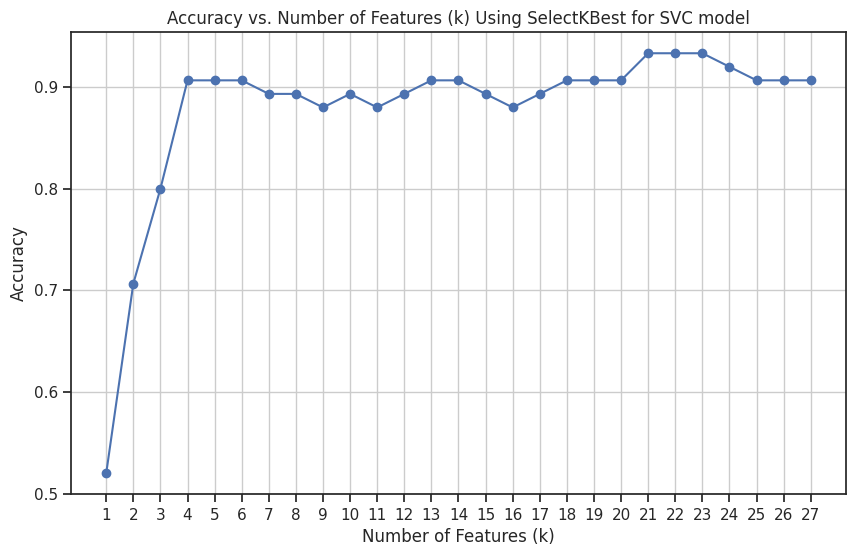

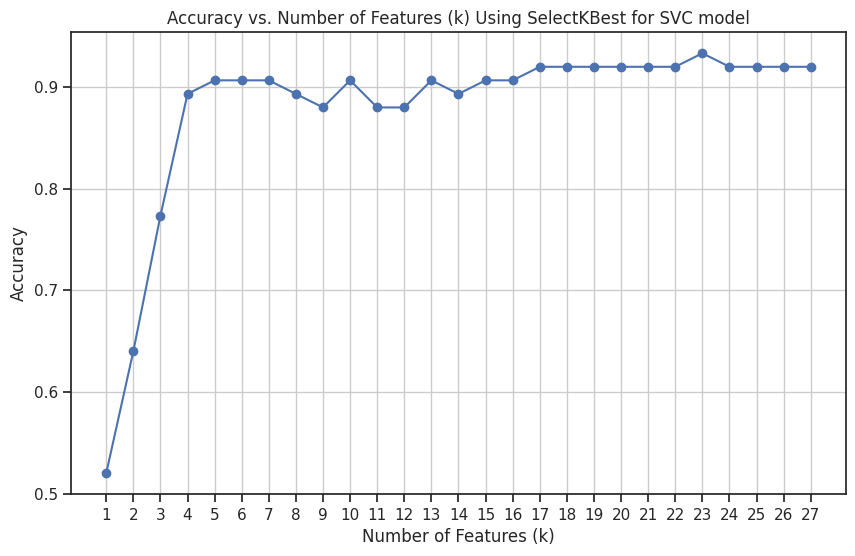

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X=d_2
y=d['Stress Level']
k_values = range(1, 28)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifiers=[SVC(kernel='linear', C=1.0, random_state=42),LogisticRegression()]
# Iterate over different values of k
for classifier in classifiers:
  accuracy_scores = []
  for k in k_values:
    # Create SelectKBest object with k best features based on ANOVA F-value
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = selector.fit_transform(X_train, y_train)
    X_test_kbest = selector.transform(X_test)



    classifier.fit(X_train_kbest, y_train)

    # Evaluate the model's accuracy on the test set
    accuracy = classifier.score(X_test_kbest, y_test)
    accuracy_scores.append(accuracy)


  plt.figure(figsize=(10, 6))
  plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
  plt.title('Accuracy vs. Number of Features (k) Using SelectKBest for SVC model')
  plt.xlabel('Number of Features (k)')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.xticks(k_values)
  plt.show()

**We used SelectKBest and fclassif to train the model using the k most important feautures for k from 1 to 27 (total number of feautures). It looks like from the above graphs, for both models the accuracy of the models does not change that much if we reduce the number of our features to 6 or 7.**

**Now let's look at the most important features in descending order:**

In [ ]:
import numpy as np

selector = SelectKBest(score_func=f_classif, k=k)
selector.fit_transform(X, y)
# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
# Get the feature scores and indices
feature_scores = selector.scores_
# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]
selected_feature_indices = np.argsort(feature_scores)[::-1][:k]

# Get the names of the selected features in descending order of importance
selected_feature_names = X.columns[selected_feature_indices]
# Print the names of the best 20 features
print("The most important features in descending order:")
for feature in selected_feature_names:
    print(feature)

The most important features in descending order:
Quality of Sleep_to_scale
Sleep Duration_to_scale
Occupation_Salesperson
Occupation_Lawyer
Age_to_scale
Gender_Female
Gender_Male
Heart Rate_to_scale
Sleep Disorder_Insomnia
Occupation_Doctor
Occupation_Teacher
Sleep Disorder_None
BMI Category_Overweight
BMI Category_Normal
Occupation_Nurse
Systolic_BP_to_scale
Sleep Disorder_Sleep Apnea
Daily Steps_to_scale
Occupation_Accountant
Occupation_Engineer
Diastolic_BP_to_scale
BMI Category_Normal Weight
Occupation_Scientist
Occupation_Sales Representative
BMI Category_Obese
Occupation_Software Engineer
Occupation_Manager


**Here we want to look at the following graph which represents the feature importance of all features based on ANOVA F-value.**

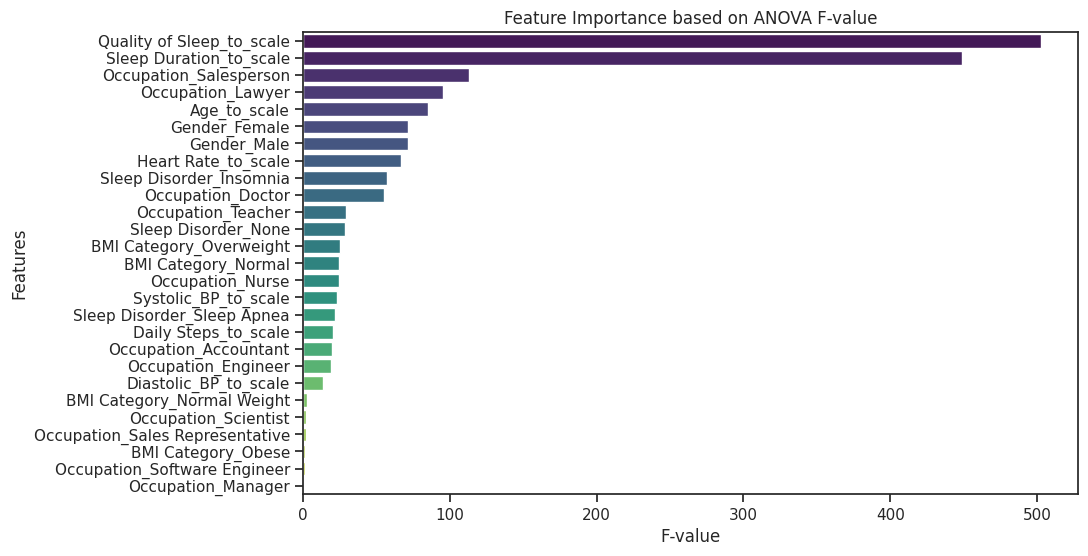

In [ ]:
k=27
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X, y)

feature_scores = selector.scores_
selected_feature_names = X.columns[selector.get_support(indices=True)]
sorted_indices = np.argsort(feature_scores)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_scores[sorted_indices], y=selected_feature_names[sorted_indices], palette='viridis')
plt.title("Feature Importance based on ANOVA F-value")
plt.xlabel("F-value")
plt.ylabel("Features")
plt.show()


**So, based on the discussion above and the list of most imporatnt features, we see that if we remove the features related to Sleep Disorder, BMI, Daily Steps_to_scale, Systolic_BP_to_scale, and Heart Rate_to_scale the accuracy of the model will stay roughly the same.**

**Now let's remove the columns mentioned above, and make a new dataframe and call it d_3:**

In [ ]:
d_3=d_2.drop(['Heart Rate_to_scale', 'Sleep Disorder_Insomnia','Sleep Disorder_None','BMI Category_Overweight', 'BMI Category_Normal','Systolic_BP_to_scale','Sleep Disorder_Sleep Apnea','Daily Steps_to_scale','Diastolic_BP_to_scale','BMI Category_Normal Weight','BMI Category_Obese'], axis=1)

In [ ]:
d_3.head()

,Gender_Female,Gender_Male,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Age_to_scale,Sleep Duration_to_scale,Quality of Sleep_to_scale
0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.00000,0.111111,0.4
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0.03125,0.148148,0.4
2,0,1,0,1,0,0,0,0,0,0,0,0,0,0.03125,0.148148,0.4
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0.03125,0.037037,0.0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0.03125,0.037037,0.0


# **Model Training**

**First we train our model using Support Vector Machine model and we see that the accuracy is about 90% which is very good:**

## **SVC Model**

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt




X=d_3
y=d['Stress Level']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create an SVM classifier
classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier using the training data
classifier.fit(X_train, y_train)

# Make predictions using the test data
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.8933333333333333
Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       0.80      0.80      0.80        10
           5       0.86      0.86      0.86        14
           6       0.89      0.80      0.84        10
           7       0.85      0.92      0.88        12
           8       0.94      0.94      0.94        17

    accuracy                           0.89        75
   macro avg       0.89      0.89      0.89        75
weighted avg       0.89      0.89      0.89        75

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  8  2  0  0  0]
 [ 0  1 12  1  0  0]
 [ 0  1  0  8  1  0]
 [ 0  0  0  0 11  1]
 [ 0  0  0  0  1 16]]


**Next, we apply the logistic regression model. The accuracy of the model is about 88%.**

## **Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       0.73      0.80      0.76        10
           5       0.86      0.86      0.86        14
           6       0.89      0.80      0.84        10
           7       0.83      0.83      0.83        12
           8       0.94      0.94      0.94        17

    accuracy                           0.88        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.88      0.88      0.88        75

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  8  2  0  0  0]
 [ 0  1 12  1  0  0]
 [ 0  1  0  8  1  0]
 [ 0  1  0  0 10  1]
 [ 0  0  0  0  1 16]]


**Finally we would like to try XGBoost algorithm. We use GrridSerach to optimize the paramters and find the best model possible.**

## **Using GridSearchCV to find the best XGBoost model**

Accuracy: 0.9733333333333334
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10
           2       1.00      0.93      0.96        14
           3       0.90      0.90      0.90        10
           4       1.00      1.00      1.00        12
           5       0.94      1.00      0.97        17

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 13  1  0  0]
 [ 0  0  0  9  0  1]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 17]]


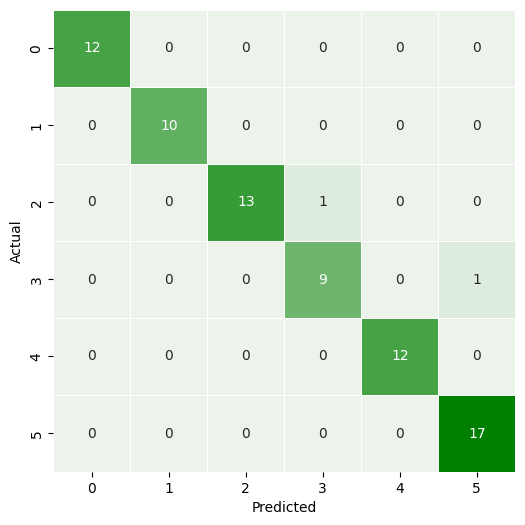

In [ ]:
import seaborn as sns

from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encod = label_encoder.fit_transform(y)

# Assuming you have your X_train, X_test, y_train, and y_test from your trained data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encod, test_size=0.2, random_state=42)
# Define the XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=8)

# Define hyperparameters for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


confusion=confusion_matrix(y_test, y_pred)


# Define a color map
cmap = sns.light_palette("green", as_cmap=True)

# Create a heatmap of the confusion matrix with colors
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap=cmap, linewidths=.5, square=True, cbar=False,
            )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Validation Accuracy: 0.92
Test Accuracy: 0.92
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         8
           2       0.88      1.00      0.93        14
           3       0.70      0.70      0.70        10
           4       1.00      0.77      0.87        13
           5       0.94      1.00      0.97        15

    accuracy                           0.92        75
   macro avg       0.92      0.91      0.91        75
weighted avg       0.92      0.92      0.92        75



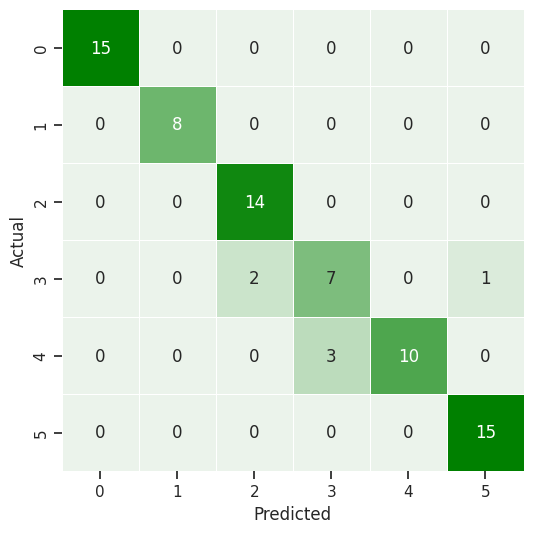

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encod = label_encoder.fit_transform(y)

# Split the data into training, validation, and test sets
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y_encod, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=8)

# Define hyperparameters for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Perform GridSearchCV to find the best hyperparameters using the training set
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_val_pred = best_model.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Make predictions on the test set using the best model
y_test_pred = best_model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Generate a classification report for the test set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Display the confusion matrix for the test set
confusion = confusion_matrix(y_test, y_test_pred)
cmap = sns.light_palette("green", as_cmap=True)

# Create a heatmap of the confusion matrix with colors
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap=cmap, linewidths=.5, square=True, cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**We see that using XGBoost and GridSearch we get about 92% accuracy! This is much higher acuracy compared to LogisticRegression and SVC models. So we use this model.**

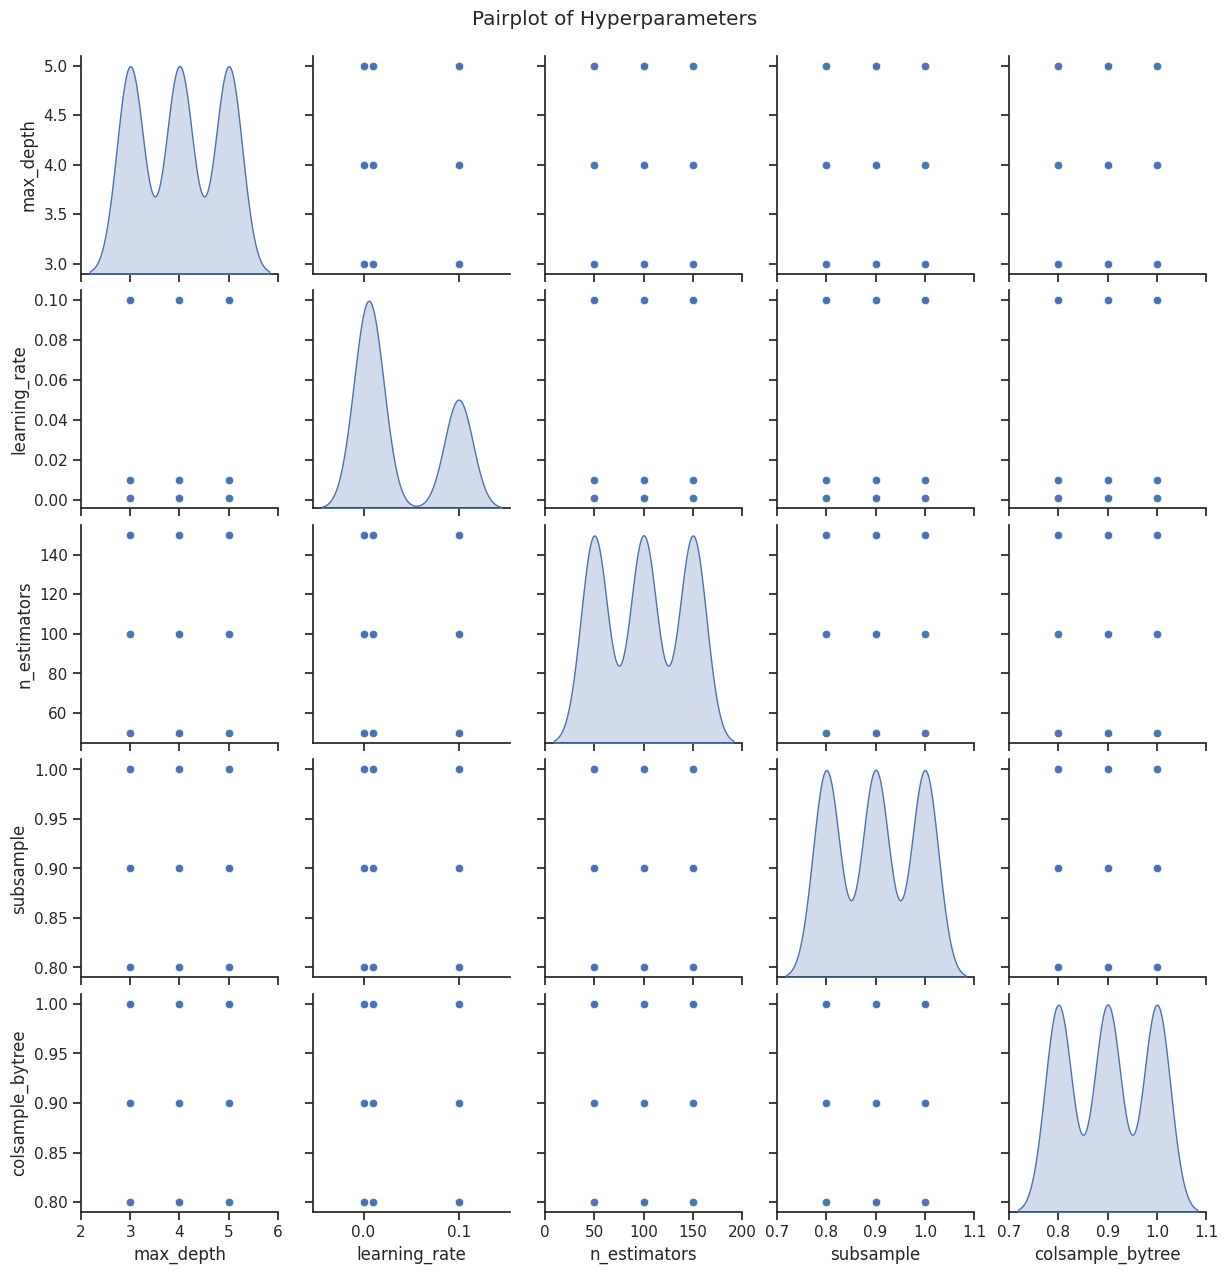

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the hyperparameters and their corresponding values
param_names = ['max_depth', 'learning_rate', 'n_estimators', 'subsample', 'colsample_bytree']
param_values = [params for params in grid_search.cv_results_['params']]
test_scores = grid_search.cv_results_['mean_test_score']

# Create a DataFrame to store the results
results_df = pd.DataFrame(param_values)
results_df['Mean Test Score'] = test_scores

# Create a pairplot to visualize interactions between hyperparameters
sns.set(style="ticks")
sns.pairplot(results_df, x_vars=param_names, y_vars=param_names, hue=None, diag_kind='kde')
plt.suptitle("Pairplot of Hyperparameters", y=1.02)

# Show the pairplot
plt.show()




**Let's look at the best model found by the GrisSearchCV:**

In [ ]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=8,
              num_parallel_tree=None, ...)

**For our model deploymnent, we save this model on a pickle file. We also save the name of the columns in X.**

# **Export the best tested model to a picke file**

In [ ]:
import pickle
with open('classification.pickle','wb') as f:
    pickle.dump(best_model,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
d['Quality of Sleep'].value_counts()

8    109
6    105
7     77
9     71
5      7
4      5
Name: Quality of Sleep, dtype: int64

In [ ]:
y.value_counts()

3    71
8    70
4    70
5    67
7    50
6    46
Name: Stress Level, dtype: int64